In [1]:
# 이 연산자는 무엇일까
a := 1

SyntaxError: invalid syntax (717499038.py, line 2)

In [ ]:
# 할당은 할당임
[a := 1, 2, 3]

In [ ]:
a

In [ ]:
f = open() # 아래와 똑같음

In [ ]:
with open() as f:  # 그러나 with가 문이기 때문에 문안에 문을 쓸 수 없기 때문에 as를 활용하는 것

In [ ]:
# 바다코끼리 연산자
# 앞에서 정의하고 다시 할 필요없음. 조건문에서 잘 쓰임
b = 1
if b > 1:

In [ ]:
if (b:=0)>1:
    print('A')

In [ ]:
# 데이터 클리닝
# 1. 데이터는 messy, dirty 하다!  => 사람, 기계 때문
# 2. 원인을 알았으니, 우선 잘못됐는지 아닌지를 알아야 함. => detecting
# 3. detecting 에서 제일 중요한 것은 domain knowledge. 이후 더이상 실수가 없어야 하니 막아야함(preventing)
# 4. 그래도 생기면 fix 해야함. (cleaning) => 이거를 파이썬에서는 pandas 로 함

In [ ]:
# 측정의 오차가 많이 발생함. 측정에 필수적으로 생기는 noise 들이 많음.
# 현실에서는 어쩔 수 없는 문제임.
# 어찌됐든 원인은 2가지로 나눈 것.

In [ ]:
# 즉 fix 하기 위해서는 잘못된 것을 찍어야 함. 인덱싱과 슬라이싱.
# 수정(fix)하기 위해서는 잘못된 것을 알기 위해 인덱싱과 슬라이싱 필요
# 그런데 인덱싱과 슬라이싱을 통해 할 수 있는 것이 기본적인 통계값을 구할 수 있는 것.
# 통계값을 구할 때 또 주목해야 하는 것이 missing data.
# 수정하는 테크닉의 가장 큰 무기는 apply, applymap, map 삼총사.

In [3]:
import seaborn as sns

In [152]:
tips = sns.load_dataset('tips')

In [ ]:
tips

In [ ]:
# 중고급 테크닉
# 전체적으로 잘못되면, apply, applymap, map 을 이용할 수 있음. 함수형 패러다임임.

In [ ]:
# map 은 Series 에만 사용할 수 있음.
tips.sex  # 이런 애들 한테만 map 사용 가능

In [ ]:
tips.sex.map(lambda x: 'F' if x=='Female' else 'M')  # 남자여자 한번에 바꿀 수 있음

In [ ]:
# 함수형 패러다임은 그 함수만 집중하면 됨.
# map 은 iterable 과 쓸 수 있음
tips.sex.map(lambda x)  # x가 하나씩 들어온다(iterable)

In [ ]:
# 성별은 종류가 몇가지인가
tips.sex.value_counts() # object, category => 데이터 타입에 따라서 쓰는 명령어가 다른데, 이 때 쓰는 것.

In [ ]:
import tensorflow as tf

In [151]:
import numpy as np

In [ ]:
a = [1,2,3,1,2,3,4,5,1,2,3,5,2,3]

In [ ]:
np.unique(a)  # 고유한 것만 뽑아서 가져옴

In [2]:
set(a) # set 해도 중복 제거 됨.

NameError: name 'a' is not defined

In [ ]:
np.unique(a, return_counts=True)  # 자리 맞는 원소가 개수를 나타냄

In [ ]:
# value_counts 특정 데이터 타입에 엄청 많이 씀
tips.sex.map(lambda x: 'F' if x=='Female' else 'M')
# 이건 적용이 안됨. 그래서 재할당 테크닉 써서 바꿔야 함.

In [ ]:
# map 이 판다스에서 좋은 이유는 dict으로도 바꿀 수 있다는 점
tips.sex.map({'Female':'F', 'Male':'M'})
# 판다스 맵의 또 다른 핵심은 파이썬과 달리 딕셔너리로 값을 바꿀 수 있음.

In [ ]:
tips.sex.map({'Female':'F', 'Mal':'M'})
# 그러나 실수 했을 때처럼 바뀔 값이 없으면 NaN 이 나옴. 

In [ ]:
tips.sex.map({'Female':'F'})

In [ ]:
tips.sex.map(lambda x: 'F' if x=='Female' else x)  # 이게 여자만 바꾸는 것.
# 따라서 상황에 따라서 위 두 가지 딕셔너리 혹은 함수 콜러블을 맞게 써야 함

In [ ]:
# 정리하면 map 은 series 에 쓸 수 있고 함수(callable)와 dict에 쓸 수 있음.
# applymap 은 df(DataFrame)에 쓸 수 있음.

In [ ]:
tips.applymap(lambda x: x+1)
# 문자열 데이터도 있어서 오류가 남.
# 모든 애를 셀 별로 연산을 하는 element-wise 연산이기 때문.

In [ ]:
tips.dtypes

In [ ]:
tips.select_dtypes('float64').applymap(lambda x: x+1)
# 셀별로 적용한 것.
# 즉, map은 컬럼에 있는 셀마다 적용한 것이고
# applymap은 모든 데이터 프레임의 셀마다 적용한 것. => 그런데 얘는 dict이 안됨.

In [ ]:
# applymap(df/callable) 만 되는 것

In [ ]:
# 마지막으로 apply.
# apply 는 시리즈도 가능하고 데이터프레임에서도 쓸 수 있음.
# apply (Series - Callable, dict(x))
#       (df - )

In [ ]:
# map 하고 똑같음. 그러나 apply는 series에서 dict 이 안됨. 즉 map을 완전 대치하지는 못함
tips.tip.apply(lambda x: x+1)

In [ ]:
# apply 는 데이터프레임에 쓸 때 골치아픔
# axis의 개념이 튀어나옴.

In [ ]:
element-wise(=vectorize)
map
applymap

apply; series, callable, dict(x)

row, column-wise => axis의 개념이 들어감
apply; df

In [ ]:
tips.select_dtypes('float64').apply(lambda x:x+1)

In [ ]:
tips.select_dtypes('float64').apply(np.sum, axis=0)
# 전체의 값을 로우, 컬럼별로 바꾸거나 집계할 때 apply를 쓰는 것

In [154]:
tips.select_dtypes('float64').applymap(np.sum)
# 이건 셀만 보니까 자기 자신에 sum 했으니 변한 게 없음

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [153]:
tips.select_dtypes('float64').apply(lambda x:x+1, axis=0)
# 합계를 할 때는 axis = 0 별로 다 해버리고
# 단독일 때는 각각 구함

,total_bill,tip
0,17.99,2.01
1,11.34,2.66
2,22.01,4.50
3,24.68,4.31
4,25.59,4.61
...,...,...
239,30.03,6.92
240,28.18,3.00
241,23.67,3.00
242,18.82,2.75


In [155]:
tips.select_dtypes('float64').apply(lambda x:x+1, axis=1)
# 변함없음
# 즉 개별적 값 구하는지 전체 구하는지를 봐야 함
# 그런데 axis=1 일 때는 다른 테크닉도 쓸 수 있음

,total_bill,tip
0,17.99,2.01
1,11.34,2.66
2,22.01,4.50
3,24.68,4.31
4,25.59,4.61
...,...,...
239,30.03,6.92
240,28.18,3.00
241,23.67,3.00
242,18.82,2.75


In [156]:
tips.select_dtypes('float64').apply(lambda x:x['tip']+1, axis=1)
# x 가 컬럼으로 들어왔음.
# 내가 합계를 구할 때는, 그리고 특정값을 구할 때는 리턴이 시리즈가 됨.
# 개별적으로 구할 때는 리턴이 데이터프레임이 됨.

0      2.01
1      2.66
2      4.50
3      4.31
4      4.61
       ... 
239    6.92
240    3.00
241    3.00
242    2.75
243    4.00
Length: 244, dtype: float64

In [ ]:
# 즉 apply 는 개별적인 element-wise 도 되고
# 집계일 때는, 특히 내가 원하는 컬럼만 뽑아도 할 수 있음
# 내가 가진 데이터를 extension 해야할 때가 있음. 결합되었을 때 의미있는 정보들이 있을 수 있음.
# 즉 컬럼별로 결합시키는 것.

In [ ]:
tips.select_dtypes('float64').apply(lambda x: x['tip'] / x['total_bill'], axis=1)
# 컬럼 끼리 계산. 즉 정보를 결합시킨 것

In [ ]:
a = map(lambda x,y: x+y, [1,2, 3,4], [2,3,4,5])

In [ ]:
next(a)

In [ ]:
a = [1,2,3,4,5]

In [ ]:
dir(a)

In [ ]:
# map , applymap, apply 는 데이터를 한번에 바꿀 때 쓰는 것.
# map 은 파이썬의 짱, apply 는 판다스의 짱

In [4]:
mpg = sns.load_dataset('mpg')

In [ ]:
mpg.info()
# 판다스에서 문자열 데이터 타입은 object. => 정규식이 중요해짐

In [ ]:
mpg.name # Series, record array

In [ ]:
# object 에 str을 붙히면? 여러가지 사용할 수 있음
mpg.name.str.capitalize()

In [ ]:
# 정규식을 통해서 특정 데이터 뽑아낼 수 있음
mpg.name.str.contains('^chev')

In [ ]:
len(mpg[mpg.name.str.contains('^chev')])

In [ ]:
mpg.name.value_counts()

In [ ]:
mpg # 회사이름이 앞에 붙어있음
# 회사라는 정보를 추출할 수 있을 것 같음

In [ ]:
mpg.name.str.extract('(\w+)\s(\w+)')

# Signature: mpg.name.str.extract(pat: 'str', flags: 'int' = 0, expand: 'bool' = True)
#  -> 'DataFrame | Series | Index'
# Docstring:
# Extract capture groups in the regex `pat` as columns in a DataFrame.

In [ ]:
mpg.name.str.split(' ')

In [ ]:
mpg.name.str.split(' ', expand=True)

In [ ]:
# 패턴을 찾는 것을 정규식으로 찾음

In [ ]:
# 이 동네 왕이 apply.

In [ ]:
a = "근영님 예뻐여"

In [ ]:
dir(a)

In [ ]:
mpg.name.str.
# 해서 나오는 것들은 문자열, 정규식에서 기본적으로 들어있는 것이 대부분 다 들어있음

In [ ]:
# 우리가 많이 쓰는 endswith, startswith -> 정규식으로 대체가능 함

In [ ]:
# is 가 붙어있는 함수를 predicate. => True/False 를 주는 애들.
# 우리는 join, split 만 볼 것

In [ ]:
a.split()
# 이걸 하는 이유는, 데이터를 쪼갤 필요가 있음.
# 위 mpg 에서는 회사 차 이름으로 구분해야 하기 때문
# split은 기본 옵션은 공백을 기준으로 쪼갬

In [ ]:
a = "근영님, 예뻐여"

In [ ]:
a.split(',')

In [ ]:
mpg
# name 은 올바르지 않음
# 두 개이상의 정보가 하나의 셀에 다 포함되어 있기 때문(회사이름, 차 이름)
# 그래서 쪼개주면 좋음. 쪼갤 때 split

In [ ]:
# 쪼갰으니까 붙힐 때 join. 어떤 데이터는 합쳐야 의미가 있음.
# split 의 반대는 concatenate
"근영" + "미인"

In [ ]:
# sequence 데이터 타입에서 + 는 뒤에 가져다 붙히는 것.
# 근데 이것도 가능함(더하기를 안해도 붙여버림)
"근영""미인"

In [ ]:
a

In [ ]:
# join
a.join('abcde')

# Signature: a.join(iterable, /)
# Docstring:
# Concatenate any number of strings.

# iterable 이니까 하나씩 뽑아옴.
# 하니씩 뽑아서 붙히고 합친다.

In [ ]:
' '.join('abcde')

In [ ]:
a.join(',')

In [ ]:
','.join(a)

In [ ]:
# 문자열을 쪼개고 붙히는 것은 분석할 때 아주 중요한 테크닉 중 하나.

In [ ]:
[x for x in dir(a) if 'split' in x]
# 뭐가 있는지 없는지 확인할 때 사용하는 꼼수 테크닉

In [ ]:
a = "근영님, 예뻐여    "

In [ ]:
a.rsplit()

In [ ]:
# 어제 내용을 수정하는 것도 있고, 잘못된 구조를 수정하는 것도 있다.

In [ ]:
# Tidy Data => 말끔한 데이터.
# Tidy Data 는 한국말로 분석하기 좋은 데이터라고 번역함.
# 얘를 long form data 혹은 narrow data 라고 예전에는 말했음.
# 관계형 DB로 생각하면 끝임

In [ ]:
# 연습용 데이터셋으로 한 번 해보자.

In [6]:
import pandas as pd

In [7]:
tb = pd.read_csv('https://raw.githubusercontent.com/hadley/tidy-data/master/data/tb.csv')

In [8]:
tb

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [9]:
# read_csv 는 웹에서 직접 불러오는 기능도 알았음.
# 확장자 보니 txt임. 그런데 read_txt 는 없음. 기본적인 모든 txt 는 read_csv 로 가능함
pd.read_csv('pew.txt')  # 이쁘게 안나옴. \t 가 있어서.
# 그래서 sep 혹은 delimiter 를 사용해서 쪼개서 들어갈 수 있음

,"religion\t""<$10k""\t""$10-20k""\t""$20-30k""\t""$30-40k""\t""$40-50k""\t""$50-75k""\t""$75-100k""\t""$100-150k""\t"">150k""\t""Don't know/refused"""
0,Agnostic\t27\t34\t60\t81\t76\t137\t122\t109\t8...
1,Atheist\t12\t27\t37\t52\t35\t70\t73\t59\t74\t76
2,Buddhist\t27\t21\t30\t34\t33\t58\t62\t39\t53\t54
3,Catholic\t418\t617\t732\t670\t638\t1116\t949\t...
4,Don’t know/refused\t15\t14\t15\t11\t10\t35\t21...
5,Evangelical Prot\t575\t869\t1064\t982\t881\t14...
6,Hindu\t1\t9\t7\t9\t11\t34\t47\t48\t54\t37
7,Historically Black Prot\t228\t244\t236\t238\t1...
8,Jehovah's Witness\t20\t27\t24\t24\t21\t30\t15\...
9,Jewish\t19\t19\t25\t25\t30\t95\t69\t87\t151\t162


In [12]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [11]:
pew = pd.read_csv('pew.txt', sep='\t')

In [13]:
pd.wide_to_long  # 유연하게 녹이는 melting. R에서 쓰이지만 판다스에서 가져옴.

<function pandas.core.reshape.melt.wide_to_long(df: 'DataFrame', stubnames, i, j, sep: 'str' = '', suffix: 'str' = '\\d+') -> 'DataFrame'>

In [14]:
pew.melt('religion')  # religion 빼고 나머지는 variable value 형태로 둬라!!

# Signature:
# pew.melt(
#     id_vars=None,    => melting 시키지 않을 부분
#     value_vars=None,
#     var_name=None,
#     value_name='value',
#     col_level: 'Level' = None,
#     ignore_index: 'bool' = True,
# ) -> 'DataFrame'

# 실수의 위험이 확 줄어듦. 그리고 데이터 하나가 추가되면 한개만 딱 추가할 수 있어서 쉬움 => tidy data 꼴

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [15]:
# 그러면 이제 이름을 바꾸고 싶은 욕망이 듦.
pew.melt('religion', var_name='income', value_name='freq')

,religion,income,freq
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [16]:
# 그런데 위 결과는 pew 에 반영 안됨. 따라서 계속 사용하기 위해서 재할당 테크닉 활용.
# 이게 tidy 논문의 첫번째 예시.
# 이것이 비교도 안되게 유지보수가 쉬움. 관계형 데이터와 같은 이야기
# 거꾸로 복원시키는 것도 쉬움.
# pivot, aggregation 방법.

In [19]:
# 빌보드 데이터 셋
bb = pd.read_csv('https://raw.githubusercontent.com/hadley/tidy-data/master/data/billboard.csv')
# 안 읽어짐. 에러메시지를 보니
# 유니코드 디코딩 에러를 보임 -> 한국에서 가진 데이터는 인코딩 cp949. 미국 공공기관은 인코딩은 latin1

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7614: invalid start byte

In [20]:
bilboard = pd.read_csv('https://raw.githubusercontent.com/hadley/tidy-data/master/data/billboard.csv', encoding='latin1')

In [21]:
bilboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
bilboard.columns[:7]

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked'],
      dtype='object')

In [23]:
# 위 데이터는 어떤 문제점이 있을까?
# week 이전에는 데이터로 충분함.
# 빌보드 몇주차에는 등수가 없어서 NaN 값이 많음. => 데이터분석 프레임워크에서 잘 안돌아 감.
# melt 에서 고정시킬 애만 줌
bilboard.melt(bilboard.columns[:7])  # long 됨

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,x76th.week,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,x76th.week,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,x76th.week,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,x76th.week,NaN


In [24]:
# 위에서 Nan 값은 필요없음. NaN을 다 drop 해버리면 됨.
bilboard.melt(bilboard.columns[:7]).dropna()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
...,...,...,...,...,...,...,...,...,...
19663,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x63rd.week,45.0
19700,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,x63rd.week,50.0
19980,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x64th.week,50.0
20017,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,x64th.week,50.0


In [25]:
bilboard_melt = bilboard.melt(bilboard.columns[:7]).dropna()

In [26]:
# 주차 데이터를 숫자로 하는 것이 더 좋을 것 같음.
# 정규식에서 숫자만 뽑아내는 것.
bilboard_melt.variable.str.extract('(\d+)')

,0
0,1
1,1
2,1
3,1
4,1
...,...
19663,63
19700,63
19980,64
20017,64


In [27]:
bilboard_melt['variable'] = bilboard_melt.variable.str.extract('(\d+)')

In [28]:
bilboard_melt

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...,...,...,...
19663,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,63,45.0
19700,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,63,50.0
19980,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,64,50.0
20017,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,64,50.0


In [29]:
bilboard_melt.variable.str.replace('.week','')

# Signature:
# bilboard_melt.variable.str.replace(
#     pat: 'str | re.Pattern',
#     repl: 'str | Callable',
#     n: 'int' = -1,
#     case: 'bool | None' = None,
#     flags: 'int' = 0,
#     regex: 'bool | None' = None,)

# replace 반복하다보면 숫자만 남을수 있다.

/var/folders/jk/hj7g6jys2pn87pvkrlq6q6kh0000gn/T/ipykernel_18907/2244072025.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  bilboard_melt.variable.str.replace('.week','')


0         1
1         1
2         1
3         1
4         1
         ..
19663    63
19700    63
19980    64
20017    64
20334    65
Name: variable, Length: 5307, dtype: object

In [30]:
# 이런 것들이 다 클리닝.
# 그런데 숫자데이터로 바꿔도 기본적으로 데이터 타입이 있음.
bilboard_melt.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
variable            object
value              float64
dtype: object

In [31]:
# 데이터 타입 형태를 바꿔줘야 함. 이것이 매우 중요함.
# value 의 순위는 int 로 바꿔주는 것이 좋음.
bilboard_melt['value'] = bilboard_melt.value.astype('int64')

In [32]:
bilboard_melt

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57
...,...,...,...,...,...,...,...,...,...
19663,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,63,45
19700,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,63,50
19980,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,64,50
20017,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,64,50


In [33]:
bilboard_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 0 to 20334
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             5307 non-null   int64 
 1   artist.inverted  5307 non-null   object
 2   track            5307 non-null   object
 3   time             5307 non-null   object
 4   genre            5307 non-null   object
 5   date.entered     5307 non-null   object
 6   date.peaked      5307 non-null   object
 7   variable         5307 non-null   object
 8   value            5307 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 414.6+ KB


In [ ]:
# year도 애매함. 다 똑같은 거니까. 그런데 스타일 따라 남겨놓을 수 있음.
# 시계열 데이터가 골치가 아픔

In [34]:
tb

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [35]:
tb.filter(regex='^new_sp')

# Signature:
# tb.filter(
#     items=None,
#     like: 'str | None' = None,
#     regex: 'str | None' = None,
#     axis=None,
# ) -> 'NDFrameT'

,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,198.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,656.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,199.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,153.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [36]:
tb_melt = tb.melt(['iso2','year']).dropna()
# 여기서 성별 정보 하나 따로 뽑아서 옆에 추가 => map or apply 써서

In [37]:
tb_melt

,iso2,year,variable,value
4,AD,1993,new_sp,15.0
5,AD,1994,new_sp,24.0
6,AD,1996,new_sp,8.0
7,AD,1997,new_sp,17.0
8,AD,1998,new_sp,1.0
...,...,...,...,...
120964,VU,2008,new_sp_fu,0.0
121038,YE,2008,new_sp_fu,0.0
121092,ZA,2008,new_sp_fu,0.0
121119,ZM,2008,new_sp_fu,0.0


In [38]:
tb_melt['variable'] = tb_melt.variable.str.replace('new_sp','')

In [39]:
tb_melt
# 위의 공백은 그냥 new_sp. 성별정보 없이 나왔던 것을 표시해둔 것

,iso2,year,variable,value
4,AD,1993,,15.0
5,AD,1994,,24.0
6,AD,1996,,8.0
7,AD,1997,,17.0
8,AD,1998,,1.0
...,...,...,...,...
120964,VU,2008,_fu,0.0
121038,YE,2008,_fu,0.0
121092,ZA,2008,_fu,0.0
121119,ZM,2008,_fu,0.0


In [40]:
tb_melt.variable.value_counts()
# 잘못된 데이터가 3067 개 => 지울지 말지 고민해야 함.
# 지운 테이블 하나 만들고, 안지운 테이블 하나 만들어서 비교해야 함.
# 맨위는 남녀 구분 안한 데이터라고 볼 수 있음.
# u 는 unknown 으로 나이 기입 안한 것. 이런 것을 noise 데이터

          3067
_m4554    2407
_m3544    2401
_m5564    2400
_m2534    2394
_m65      2394
_m1524    2393
_f4554    2387
_f2534    2386
_f3544    2384
_f65      2382
_f1524    2380
_f5564    2380
_m014     2367
_f014     2364
_f514      404
_m514      401
_f04       393
_m04       392
_mu        272
_fu        271
Name: variable, dtype: int64

In [41]:
# 먼저 남자여자를 쪼개자!
# 맨 위의 데이터는 버린 데이터를 새로 만들어야 함 => 카피 사용
tb_melt[tb_melt.variable=='']

,iso2,year,variable,value
4,AD,1993,,15.0
5,AD,1994,,24.0
6,AD,1996,,8.0
7,AD,1997,,17.0
8,AD,1998,,1.0
...,...,...,...,...
5764,ZW,2004,,14581.0
5765,ZW,2005,,13155.0
5766,ZW,2006,,12718.0
5767,ZW,2007,,10583.0


In [42]:
tb_melt2 = tb_melt[tb_melt.variable!=''].copy()
# copy 를 잘 활용해야 함!!

In [43]:
tb_melt2

,iso2,year,variable,value
5784,AD,2005,_m04,0.0
5785,AD,2006,_m04,0.0
5787,AD,2008,_m04,0.0
5811,AE,2006,_m04,0.0
5812,AE,2007,_m04,0.0
...,...,...,...,...
120964,VU,2008,_fu,0.0
121038,YE,2008,_fu,0.0
121092,ZA,2008,_fu,0.0
121119,ZM,2008,_fu,0.0


In [44]:
a = '근영'

In [45]:
a.startswith('근')

True

In [46]:
tb_melt2.variable.map(lambda x: 'M' if x.startswith('_m') else 'F')
# 성별 컬럼 하나 만들어서 붙히기

5784      M
5785      M
5787      M
5811      M
5812      M
         ..
120964    F
121038    F
121092    F
121119    F
121148    F
Name: variable, Length: 35552, dtype: object

In [47]:
tb_melt2['sex'] = tb_melt2.variable.map(lambda x: 'M' if x.startswith('_m') else 'F')

In [48]:
tb_melt2

,iso2,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [118]:
# 이제는 나이대(age)
tb_melt2.variable.value_counts()

_m4554    2407
_m3544    2401
_m5564    2400
_m65      2394
_m2534    2394
_m1524    2393
_f4554    2387
_f2534    2386
_f3544    2384
_f65      2382
_f5564    2380
_f1524    2380
_m014     2367
_f014     2364
_f514      404
_m514      401
_f04       393
_m04       392
_mu        272
_fu        271
Name: variable, dtype: int64

In [129]:
tb_melt3 = tb_melt2[tb_melt2.variable.str.contains('_\w[0-9]+')]

In [130]:
tb_melt3

,iso2,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
115375,ZW,2004,_f65,111.0,F
115376,ZW,2005,_f65,603.0,F
115377,ZW,2006,_f65,96.0,F
115378,ZW,2007,_f65,90.0,F


In [136]:
tb_melt3['age'] = tb_melt3.variable.str.extract('(\d+)')

/var/folders/jk/hj7g6jys2pn87pvkrlq6q6kh0000gn/T/ipykernel_18907/355581160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_melt3['age'] = tb_melt3.variable.str.extract('(\d+)')


In [140]:
tb_melt3

,iso2,year,variable,value,sex,age
5784,AD,2005,_m04,0.0,M,04
5785,AD,2006,_m04,0.0,M,04
5787,AD,2008,_m04,0.0,M,04
5811,AE,2006,_m04,0.0,M,04
5812,AE,2007,_m04,0.0,M,04
...,...,...,...,...,...,...
115375,ZW,2004,_f65,111.0,F,65
115376,ZW,2005,_f65,603.0,F,65
115377,ZW,2006,_f65,96.0,F,65
115378,ZW,2007,_f65,90.0,F,65


In [148]:
tb_melt3['variable'] = tb_melt3.variable.str.replace('_', '').str.extract('(\w)').applymap(lambda x: 'M' if x == 'm' else 'F')

/var/folders/jk/hj7g6jys2pn87pvkrlq6q6kh0000gn/T/ipykernel_18907/2766660606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_melt3['variable'] = tb_melt3.variable.str.replace('_', '').str.extract('(\w)').applymap(lambda x: 'M' if x == 'm' else 'F')


In [149]:
tb_melt3

,iso2,year,variable,value,sex,age
5784,AD,2005,M,0.0,M,04
5785,AD,2006,M,0.0,M,04
5787,AD,2008,M,0.0,M,04
5811,AE,2006,M,0.0,M,04
5812,AE,2007,M,0.0,M,04
...,...,...,...,...,...,...
115375,ZW,2004,F,111.0,F,65
115376,ZW,2005,F,603.0,F,65
115377,ZW,2006,F,96.0,F,65
115378,ZW,2007,F,90.0,F,65


In [ ]:
# 구조 잘못된 것을 고치는 것이 tidy data

In [ ]:
# 우리는 지금 데이터 전처리를 하고 있음.

In [ ]:
# 우리는 함수만 잘 짤 수 있으면 다 할 수 있음. apply, applymap, map 으로 다 처리할 수 있음
# 물론 .str 로 미리 정의된 함수를 사용할 수 있었음.
# 특히 중요한 것은 정규식 => 우리가 수집하는 웹 데이터는 싹다 문자로 되어 있음.

In [1]:
import pandas as pd

In [30]:
weather = pd.read_csv('weather.txt', engine='python', sep='|')

In [31]:
weather

,MX000017004195504TMAX 310 I 310 I 310 I 320 I 330 I 320 I 320 I 330 I 330 I 330 I 330 I 320 I 310 I 310 I 320 I 320 I 320 I 310 I 310 I 320 I 320 I 330 I 330 I 330 I 330 I 330 I 330 I 340 I 330 I 320 I-9999
0,MX000017004195504TMIN 150 I 150 I 160 I ...
1,MX000017004195504PRCP 0 I 0 I 0 I ...
2,MX000017004195505TMAX 310 I 310 I 310 I ...
3,MX000017004195505TMIN 200 I 160 I 160 I ...
4,MX000017004195505PRCP 0 I 0 I 0 I ...
...,...
1708,MX000017004201103TMIN-9999 -9999 -9999 -...
1709,MX000017004201103PRCP 0 S-9999 0 S ...
1710,MX000017004201104TMAX-9999 350 S-9999 -...
1711,MX000017004201104TMIN-9999 168 S-9999 -...


In [ ]:
# tidy data 개념을 통해서 구조를 수정할 수 있었다! => 이거를 알아야 함.

In [221]:
# 판다스의 테크닉. 이름바꾸는 테크닉
tb_melt2

,iso2,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [ ]:
# 이름을 바꾸는 이유는 편의성 때문!!
# 이름에 특수문자나 공백이 있으면, .해서 엑세스 할 수 없음. 즉 record array 로 접근할 수 없음.
# 그리고 size 같은 넘파이의 프로퍼티와 충돌남.

In [222]:
tb_melt2.rename({'iso2':'iso'})

# Signature:
# tb_melt2.rename(
#     mapper: 'Renamer | None' = None,   => dict 의 구조를 mapping 구조라고 함.
#     *,
#     index: 'Renamer | None' = None,
#     columns: 'Renamer | None' = None,
#     axis: 'Axis | None' = None,
#     copy: 'bool | None' = None,
#     inplace: 'bool' = False,
#     level: 'Level' = None,
#     errors: 'IgnoreRaise' = 'ignore',
# ) -> 'DataFrame | None'

,iso2,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [224]:
# 안바뀜. 안바뀌는 이유가 axis. axis 는 컬럼을 바꾸라고 해서 1을 줘야함
tb_melt2.rename({'iso2':'iso'}, axis=1, inplace=True)
# 반영 안됨. 재할당 해줘야 함.
# inplace 라는 테크닉도 있음 => return 값이 없음
# mutable 할 때 변하는 테크닉.
# mutable 관례상 자기 자신 변할 때는 리턴이 없음

In [225]:
# inplace=True 로 했더니 바뀜
tb_melt2

,iso,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [ ]:
# mutable 리턴값
# 자기자신 그대로(메모리값 그대로) 있는데 바뀔 수 있음 -> inplace
# 기본옵션이 mutable 이라 위험하니까 False가 기본값

In [ ]:
# 넘파이는 mutable이다. 따라서 당연히 됨.

In [227]:
tb_melt2.rename(columns={'iso':'ips3'})
# columns 말에는 axis 가 숨어있으니까 할 필요 없음
# axis=0 하면 두개가 충돌나서 에러가 남.
# axis=1 도 명시적으로 줘도 에러남. 입력 안하게 만들었기 때문에.

,ips3,year,variable,value,sex
5784,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [229]:
# index 바꾸기
tb_melt2.rename({5784:'sun'}, axis=0)

,iso,year,variable,value,sex
sun,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [230]:
# index= 줘버리면 axis 생략
tb_melt2.rename(index={5784:'sun'})

,iso,year,variable,value,sex
sun,AD,2005,_m04,0.0,M
5785,AD,2006,_m04,0.0,M
5787,AD,2008,_m04,0.0,M
5811,AE,2006,_m04,0.0,M
5812,AE,2007,_m04,0.0,M
...,...,...,...,...,...
120964,VU,2008,_fu,0.0,F
121038,YE,2008,_fu,0.0,F
121092,ZA,2008,_fu,0.0,F
121119,ZM,2008,_fu,0.0,F


In [231]:
tb_melt2.drop(columns=['year'])

# Signature:
# tb_melt2.drop(
#     labels: 'IndexLabel' = None,
#     *,
#     axis: 'Axis' = 0,
#     index: 'IndexLabel' = None,
#     columns: 'IndexLabel' = None,
#     level: 'Level' = None,
#     inplace: 'bool' = False,
#     errors: 'IgnoreRaise' = 'raise',
# ) -> 'DataFrame | None'

,iso,variable,value,sex
5784,AD,_m04,0.0,M
5785,AD,_m04,0.0,M
5787,AD,_m04,0.0,M
5811,AE,_m04,0.0,M
5812,AE,_m04,0.0,M
...,...,...,...,...
120964,VU,_fu,0.0,F
121038,YE,_fu,0.0,F
121092,ZA,_fu,0.0,F
121119,ZM,_fu,0.0,F


In [232]:
tb_melt2.drop('year', axis=1)

,iso,variable,value,sex
5784,AD,_m04,0.0,M
5785,AD,_m04,0.0,M
5787,AD,_m04,0.0,M
5811,AE,_m04,0.0,M
5812,AE,_m04,0.0,M
...,...,...,...,...
120964,VU,_fu,0.0,F
121038,YE,_fu,0.0,F
121092,ZA,_fu,0.0,F
121119,ZM,_fu,0.0,F


In [233]:
tb_melt2.drop(columns=['value','sex'])
# 1 개일때는 문자열, 두개 이상일 때는 list => pandas 기본 사용법

,iso,year,variable
5784,AD,2005,_m04
5785,AD,2006,_m04
5787,AD,2008,_m04
5811,AE,2006,_m04
5812,AE,2007,_m04
...,...,...,...
120964,VU,2008,_fu
121038,YE,2008,_fu
121092,ZA,2008,_fu
121119,ZM,2008,_fu


In [ ]:
# 컬럼 없애고 로우 없애는 것도 구조를 바꾸는 것 -> fixing 의 일종이라고 볼 수 있음.

In [ ]:
# 머신러닝 할 때 패턴이 없는 이름 같은 것은 머신러닝에서 예측할 수 없기 때문에 과감하게 날림.
# 모델에 따라서 오버피팅, 차원의 저주에 걸리면 컬럼을 축소.
# 구조 바꾸는 것도 다 전처리에 들어감

In [ ]:
# 수정 외에 데이터 처리 외에 데이터 기본적인 분석해주는 것이 판다스의 역할
# 간단한 통계값을 보여줌.
# 통계를 이해 못해서는 안됨.

#### 이제 선택해서 활용하기!

In [ ]:
# 거꾸로 wide form 으로 바꿔보기 또는 요약된 결과로 바꿔보자 => aggregation

In [ ]:
# 뼈대 잡기
# groupby
# sort 를 먼저하면 좋음.
# 성별로 쪼개기 -> 

In [234]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
from functools import 

In [235]:
from itertools import groupby

In [ ]:
from operator import

In [ ]:
# groupby가 순서대로 처음에 들어온 애들이 몇개씩 들어왔는가. sort 해서 쪼개기 좋게 구현해놓음


In [238]:
# 성별로 쪼개기 -> sac(split, apply, combine)
# 한 개는 문자열
# agg = aggregation (합치라는 것)
# groupby(split), apply('mean'), combine(agg)
tips.groupby('sex')[['tip', 'total_bill']].agg('mean')

,tip,total_bill
sex,,
Male,3.089618,20.744076
Female,2.833448,18.056897


In [239]:
# 동시에 여러개 가능
tips.groupby(['sex', 'day'])[['tip', 'total_bill']].agg('mean')

tip  total_bill
sex    day                       
Male   Thur  2.980333   18.714667
       Fri   2.693000   19.857000
       Sat   3.083898   20.802542
       Sun   3.220345   21.887241
Female Thur  2.575625   16.715312
       Fri   2.781111   14.145556
       Sat   2.801786   19.680357
       Sun   3.367222   19.872222

In [242]:
tips.groupby(['smoker','time'])[['tip']].agg('max')

tip
smoker time        
Yes    Lunch    5.0
       Dinner  10.0
No     Lunch    6.7
       Dinner   9.0

In [241]:
tips.groupby(['time','smoker'])[['tip']].agg('max')

tip
time   smoker      
Lunch  Yes      5.0
       No       6.7
Dinner Yes     10.0
       No       9.0

In [243]:
# 판다스는 한개는 문자열, 여러개는 리스트
tips.groupby(['smoker','time'])[['tip']].agg(['max','min'])

tip      
                max   min
smoker time              
Yes    Lunch    5.0  1.58
       Dinner  10.0  1.00
No     Lunch    6.7  1.25
       Dinner   9.0  1.00

In [ ]:
# 이렇게 집계를 해서(reduction) aggregation

In [251]:
tips.groupby(['smoker','time'], as_index=False)[['tip']].agg('max')

# Signature:
# tips.groupby(
#     by=None,
#     axis: 'Axis' = 0,
#     level: 'IndexLabel | None' = None,
#     as_index: 'bool' = True,            => 왜 기본으로 True 옵션을 두었을까?; 판다스는 그래프 그리는 것을 쉽게 해주기 때문에
#                                            index 가 x축이기 때문
#     sort: 'bool' = True,
#     group_keys: 'bool | lib.NoDefault' = <no_default>,
#     squeeze: 'bool | lib.NoDefault' = <no_default>,
#     observed: 'bool' = False,
#     dropna: 'bool' = True,
# ) -> 'DataFrameGroupBy'

,smoker,time,tip
0,Yes,Lunch,5.0
1,Yes,Dinner,10.0
2,No,Lunch,6.7
3,No,Dinner,9.0


<Axes: xlabel='smoker,time'>

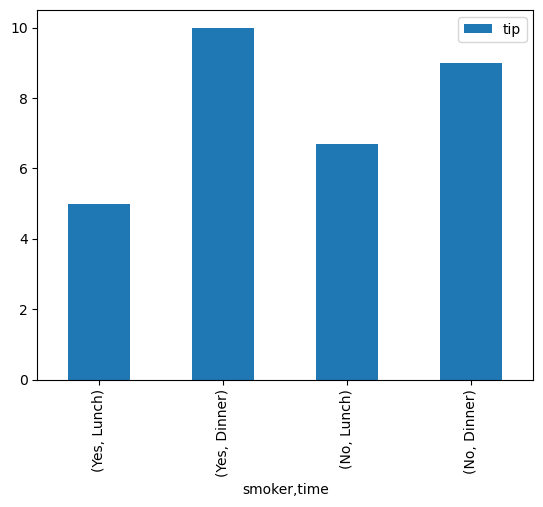

In [252]:
tips.groupby(['smoker','time'])[['tip']].agg('max').plot.bar()
# 그래프를 쉽게 그리라는 배려

In [253]:
# 사이드 테이블 사용
import sidetable

In [254]:
from sidetable import sidetable
# sidetable 은 어떤 테크닉?
# 이걸 임포트 하는 순간 stb 가 생김

['SideTableAccessor',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__email__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'sidetable']

In [257]:
# 주피터는 인덱스가 많으면 자동완성이 안됨. 그래서 할당해서 사용
x = tips.groupby(['smoker','time'])[['tip']].agg(['max', 'min']).stb

In [258]:
x.flatten()

,smoker,time,tip_max,tip_min
0,Yes,Lunch,5.0,1.58
1,Yes,Dinner,10.0,1.00
2,No,Lunch,6.7,1.25
3,No,Dinner,9.0,1.00


In [259]:
x.subtotal() # 안에서의 sub-total 을 표현함

/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sidetable/sidetable.py:464: PerformanceWarning: indexing past lexsort depth may impact performance.
  section = self._obj.xs(cross_section, drop_level=False)
/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sidetable/sidetable.py:464: PerformanceWarning: indexing past lexsort depth may impact performance.
  section = self._obj.xs(cross_section, drop_level=False)


tip      
                             max   min
smoker      time                      
Yes         Lunch            5.0  1.58
            Dinner          10.0  1.00
            Yes - subtotal  15.0  2.58
No          Lunch            6.7  1.25
            Dinner           9.0  1.00
            No - subtotal   15.7  2.25
grand_total                 30.7  4.83

In [ ]:
# sidetable을 활용한 위의 것은 aggregation 한 애를 tidy data 형으로 사용할 수 있음.

In [ ]:
# aggregation 3총사
# groupby. pivot_table, crosstable

In [261]:
tips.pivot_table('tip','smoker','sex')

# Signature:
# tips.pivot_table(
#     values=None,
#     index=None,
#     columns=None,
#     aggfunc='mean',   => default
#     fill_value=None,
#     margins=False,    => 가장자리에 전체를 알려줌
#     dropna=True,
#     margins_name='All',
#     observed=False,
#     sort=True,
# ) -> 'DataFrame'

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


In [262]:
tips.pivot_table('tip','smoker','sex', margins=True)

sex,Male,Female,All
smoker,,,
Yes,3.051167,2.931515,3.008710
No,3.113402,2.773519,2.991854
All,3.089618,2.833448,2.998279


In [ ]:
# pivot 은 aggregation 하지 않음 -> 전체 표 같은 것 만들 때 구조를 바꿀 떄 사용
# pivot_table 은 aggregation
tips.pivot

In [263]:
tips.pivot_table('tip',['smoker', 'time'],'sex', margins=True)
# 안에 있는 값이 aggregation 으로 표현되기 때문에 어떤 aggregation 을 쓸지

sex                Male    Female       All
smoker time                                
Yes    Lunch   2.790769  2.891000  2.834348
       Dinner  3.123191  2.949130  3.066000
No     Lunch   2.941500  2.459600  2.673778
       Dinner  3.158052  3.044138  3.126887
All            3.089618  2.833448  2.998279

In [265]:
dir(tips)
 '__array_ufunc__'

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

In [267]:
# 'min' = np.min
# 'max' = np.max
# 이런 테크닉을 텐서플로, 파이토치에서 배움
tips.groupby(['smoker','time'])[['tip']].agg([np.max, np.min])

tip      
               amax  amin
smoker time              
Yes    Lunch    5.0  1.58
       Dinner  10.0  1.00
No     Lunch    6.7  1.25
       Dinner   9.0  1.00

In [ ]:
# np.max 는 함수
# 함수형 패러다임이 너무 어려우니까 이름, 문자열로 전달될 수 있도록 만듦. 'max'
# 함수를 인자로 전달하는 함수 이름이 있었음. higher-order-function
# 텐서플로, 파이토치 다 higher-order

In [ ]:
# 얘만 pd. 로 접근한다.
pd.crosstab